In [2]:
import asbi 
import sbi 
import sbibm 
import matplotlib.pyplot as plt 

In [5]:
from asbi.tasks import get_task 

task = get_task('two_moons')

In [12]:
simulator = task.get_simulator()
prior = task.get_prior_dist()

In [13]:
from sbi.inference import NLE

 Neural network successfully converged after 185 epochs.

/Users/hayden/miniconda3/envs/sbi/lib/python3.11/site-packages/sbi/inference/posteriors/mcmc_posterior.py:115: UserWarning: The default value for thinning in MCMC sampling has been changed from 10 to 1. This might cause the results differ from the last benchmark.
  thin = _process_thin_default(thin)


Running vectorized MCMC with 20 chains:   0%|          | 0/15000 [00:00<?, ?it/s]

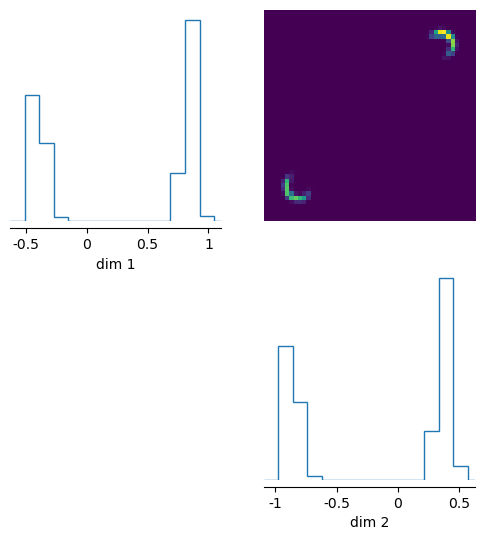

In [27]:
from sbi.analysis import pairplot

n_sims = 10000
n_obs = 2

inference = NLE(prior)
theta = prior((n_sims,))
x = simulator(theta)
_ = inference.append_simulations(theta, x).train()


obs = task.get_observation(num_observation=n_obs)

posterior = inference.build_posterior().set_default_x(obs)
posterior_sample = posterior.sample((10000,))

_ = pairplot(posterior_sample, figsize=(6,6))


In [35]:
obs = task.get_observation(num_observation=7)

posterior.set_default_x(obs)

MCMCPosterior sampler for potential_fn=<LikelihoodBasedPotential>

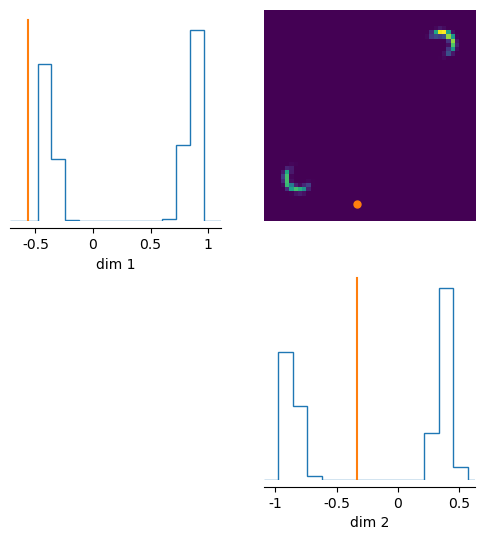

In [29]:
_ = pairplot(posterior_sample, figsize=(6,6), points=obs)


/Users/hayden/miniconda3/envs/sbi/lib/python3.11/site-packages/sbi/inference/posteriors/mcmc_posterior.py:115: UserWarning: The default value for thinning in MCMC sampling has been changed from 10 to 1. This might cause the results differ from the last benchmark.
  thin = _process_thin_default(thin)


Running vectorized MCMC with 20 chains:   0%|          | 0/6000 [00:00<?, ?it/s]

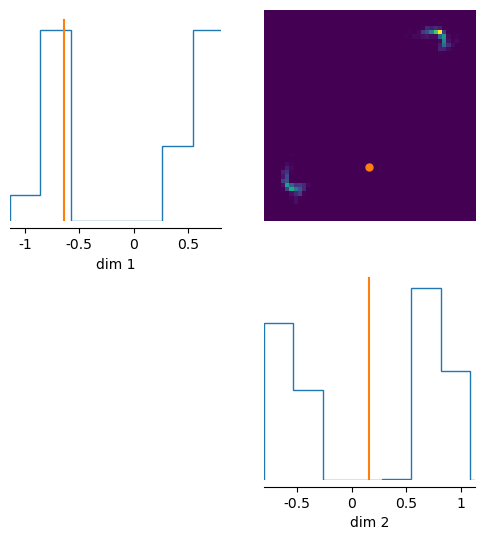

In [22]:
from sbi.analysis import pairplot

obs = task.get_observation(num_observation=1)

posterior = inference.build_posterior().set_default_x(obs)
posterior_sample = posterior.sample((1000,))

_ = pairplot(posterior_sample, figsize=(6,6))

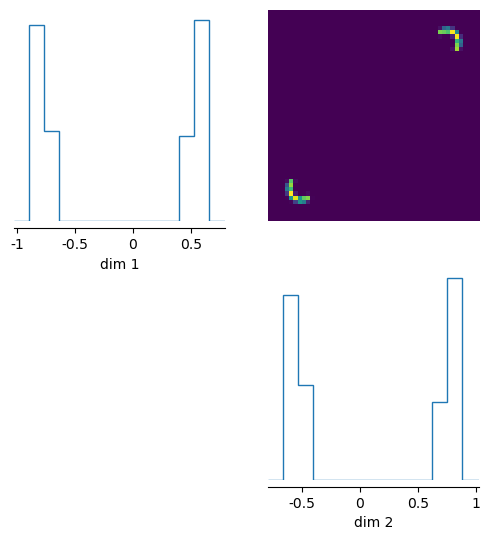

In [32]:
ref = task.get_reference_posterior_samples(num_observation=1)
_ = pairplot(ref, figsize=(6,6))

In [34]:
inference.build_posterior()

/Users/hayden/miniconda3/envs/sbi/lib/python3.11/site-packages/sbi/inference/posteriors/mcmc_posterior.py:115: UserWarning: The default value for thinning in MCMC sampling has been changed from 10 to 1. This might cause the results differ from the last benchmark.
  thin = _process_thin_default(thin)


MCMCPosterior sampler for potential_fn=<LikelihoodBasedPotential>

In [37]:
inference.build_posterior().sample((1000,), x=obs)

/Users/hayden/miniconda3/envs/sbi/lib/python3.11/site-packages/sbi/inference/posteriors/mcmc_posterior.py:115: UserWarning: The default value for thinning in MCMC sampling has been changed from 10 to 1. This might cause the results differ from the last benchmark.
  thin = _process_thin_default(thin)


Running vectorized MCMC with 20 chains:   0%|          | 0/6000 [00:00<?, ?it/s]

tensor([[-0.8419,  0.5929],
        [-0.8121,  0.6238],
        [-0.7405,  0.5836],
        ...,
        [-0.5909,  0.7991],
        [-0.5905,  0.8010],
        [-0.6010,  0.7486]])

/Users/hayden/miniconda3/envs/sbi/lib/python3.11/site-packages/sbi/inference/posteriors/mcmc_posterior.py:115: UserWarning: The default value for thinning in MCMC sampling has been changed from 10 to 1. This might cause the results differ from the last benchmark.
  thin = _process_thin_default(thin)


Running vectorized MCMC with 20 chains:   0%|          | 0/6000 [00:00<?, ?it/s]

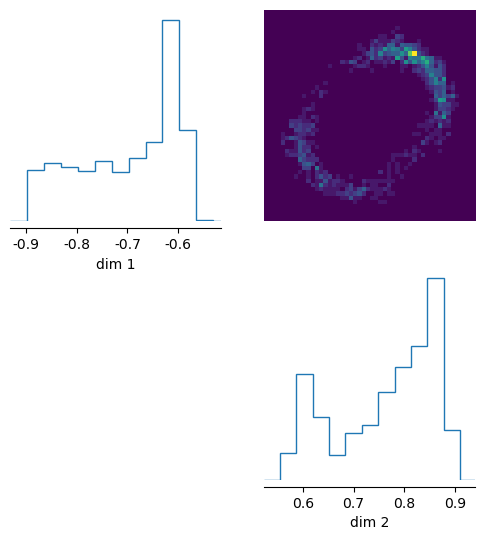

In [36]:
posterior = inference.build_posterior().set_default_x(obs)
posterior_sample = posterior.sample((1000,))

_ = pairplot(posterior_sample, figsize=(6,6))

In [17]:
from asbi.tasks import get_task

task = get_task('two_moons')
obs = task.get_observation(num_observation=2)



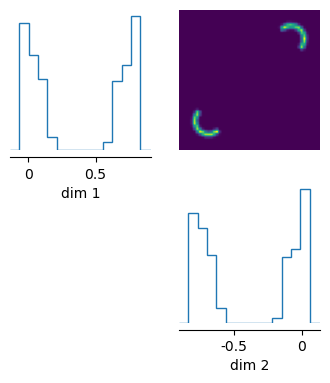

In [32]:
samples = task.get_reference_posterior_samples(num_observation=9)

from sbi.analysis import pairplot

_ = pairplot(samples, figsize=(4, 4))

In [16]:
task = sbibm.get_task('two_moons')


NameError: name 'sbibm' is not defined

In [3]:
prior = task.prior_dist
sim = task.get_simulator()

In [4]:
from sbi.inference import SNPE

n_sims = 10000
inference = SNPE(prior=prior)
theta = task.prior_dist.sample((n_sims,))
x = sim(theta)

density_estimations = inference.append_simulations(theta, x).train()
posterior = inference.build_posterior()

 Neural network successfully converged after 139 epochs.

Drawing 10000 posterior samples: 100%|██| 10000/10000 [00:00<00:00, 135378.30it/s]


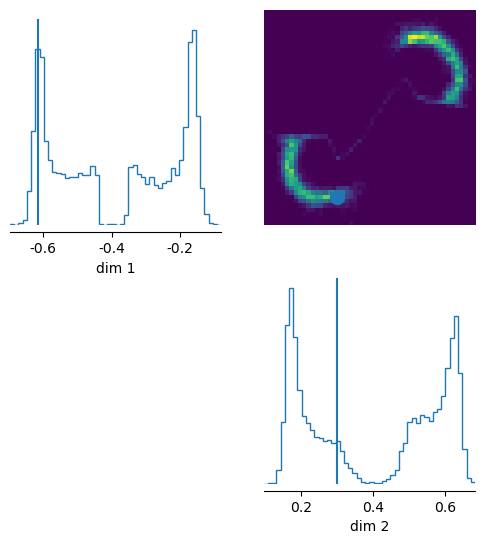

In [24]:
from sbi.analysis import pairplot

t_ = prior.sample()
x_ = sim(t_)
samples = posterior.sample((10000,), x=x_)

_ = pairplot(samples, figsize=(6, 6), points=t_)

In [21]:
posterior = inference.build_posterior()
t_ = prior.sample()
x_ = sim(t_)
samples = posterior.sample(x=x_, )

Drawing 1 posterior samples: 100%|█████████████████| 1/1 [00:00<00:00, 568.80it/s]


In [53]:
prior

tensor([-0.7982,  0.9011])

In [11]:
import numpy 
numpy.__version__

'1.24.4'

In [15]:
from pprint import pprint

pprint(vars(prior))

{}


In [21]:
pprint(vars(task))

{'dim_data': 2,
 'dim_parameters': 2,
 'name': 'two_moons',
 'name_display': 'Two Moons',
 'num_observations': 10,
 'num_posterior_samples': 10000,
 'num_reference_posterior_samples': 10000,
 'num_simulations': [100, 1000, 10000, 100000, 1000000],
 'observation_seeds': [1000011,
                       1000001,
                       1000002,
                       1000003,
                       1000013,
                       1000005,
                       1000006,
                       1000007,
                       1000008,
                       1000009],
 'path': PosixPath('/Users/hayden/miniconda3/envs/sbibm/lib/python3.10/site-packages/sbibm/tasks/two_moons'),
 'prior_dist': Independent(Uniform(low: torch.Size([2]), high: torch.Size([2])), 1),
 'prior_params': {'high': tensor([1., 1.]), 'low': tensor([-1., -1.])},
 'simulator_params': {'a_high': 1.5707963267948966,
                      'a_low': -1.5707963267948966,
                      'base_offset': 0.25,
                 

In [29]:
task.prior_dist.sample()

tensor([-0.6231, -0.7277])

In [39]:
import numpy as np 

x = np.ones((6, 4, 2))


x.shape

(6, 4, 2)

In [43]:
x.mean(axis=2).shape

(6, 4)

In [47]:
d = {
    'task': 'two_moons'
}

d['task']

'two_moons'

In [76]:
x, y, z = 2, 2, 4
n=np.reshape(np.random.randint(0, 100, x * y * z), (x, y, z))
n.shape


(2, 2, 4)

In [82]:
n[:,:,3].mean(axis=0).shape

(2,)

In [73]:
for i in range(2):
    print(n[:, i ,:].mean(axis=0).shape)

(1,)
(1,)


In [74]:
x = np.ones((2, 2, 1))

for i in range(2):
    mean = results[:, :,0,].mean(axis=0)
    

x[:,2,:].mean(axis=0)

NameError: name 'results' is not defined

In [ ]:
import pickle as pk

with open('../res.pkl', 'wb') as f:
    pk.dump(x, f)